# Test

------------------------------------------

In [1]:
# from BuildAnimation import *

# ab = AnimationBuilder(build_single_person_scene_two_poses)

# ab.maya_controller.UndoToBeginning(max_step=1000)

# ab.BuildScene()

# ab.BuildDefaultFrame()

# endFrame_node = ab.pg.node_dict["end frame"]

# endFrame_node.next_frame

# ab.maya_controller.SetCurrentTimeFrame(endFrame_node.next_frame)

# ab.BuildFrame(endFrame_node)

# ab.maya_controller.ScreenShot("E:/Temp/Test0")

# ab.pg.node_dict

# endBody = ab.pg.node_dict['end body']

# endBody.chest_leaf.selected_file

# Test AOG2

In [2]:
from Raven.BuildTree2 import *

In [3]:
scene = build_scene()

In [4]:
scene.node_dict

{}

In [5]:
pg = scene.sample()

In [6]:
pg.node_dict

{'init frame': Frame.init frame,
 'transform': Layout.transform,
 'relation': Layout.relation,
 'animation1': Animation.animation1,
 'motion1': Layout.motion1,
 'emotion1': Layout.emotion1,
 'motion2': Layout.motion2,
 'emotion2': Layout.emotion2,
 'animation2': Animation.animation2}

In [7]:
pg.node_dict['transform'].position_leaf.relativePosition

[6, 2]

In [8]:
print(pg.node_dict['relation'].generation)
print(pg.node_dict['relation'].relation)

younger
society


In [9]:
print(pg.node_dict['motion1'].selected_motion)
print(pg.node_dict['motion1'].start_time)
print(pg.node_dict['motion2'].selected_motion)
print(pg.node_dict['motion2'].start_time)

Disappointed
-1.3988727091797184
Strong
-1.8015251170367987


In [10]:
print(pg.node_dict['emotion1'].start_emotion)
print(pg.node_dict['emotion1'].end_emotion)
print(pg.node_dict['emotion1'].start_time)
print(pg.node_dict['emotion2'].start_emotion)
print(pg.node_dict['emotion2'].end_emotion)
print(pg.node_dict['emotion2'].start_time)

Madness
Disgust
-20.387064405218673
Scared
Angry
0.46598192656109916


In [11]:
import os
os.getcwd()

'E:\\researches\\EQTest\\SocialAffordance'

In [12]:
# VAD_DICT = {}

# with open("../data/NRC-VAD-Lexicon.txt") as f:
#     for c, line in enumerate(f.readlines()):
#         if c == 0:
#             continue
#         line_info = line.strip().split("\t")
#         #print(line_info)
#         VAD_DICT[line_info[0]] = [float(line_info[1]), float(line_info[2]), float(line_info[3])]

In [13]:
get_relation_emotion_scores(pg, G_EMOTION2VAD)

[0.11945499999999999, -0.41958]

In [14]:
get_relation_motion_scores(pg, G_MOTION2VAD)

[-0.4409999999999997, -1.0949999999999998]

In [15]:
get_motion_emotion_scores(pg, G_MOTION2VAD, G_EMOTION2VAD)

[-0.04702300000000001, 0.354607]

In [16]:
def load_survey(label_path):
    survey = []
    with open(label_path, "r") as f:
        for c, line in enumerate(f.readlines()):
            line_info = line.strip().split(",")
            #print(c)
            sample_info = line_info[0].split("_")
            #print(sample_info)
            if len(sample_info) < 8:
                continue
            item = {"m1": sample_info[0], "e11": sample_info[1], "e12": sample_info[2],
                   "m2": sample_info[3], "e21": sample_info[4], "e22": sample_info[5],
                   "d": sample_info[6], "t": sample_info[7]}
            label_info = line_info[1].split("_")
            item["quality"] = label_info[0]
            item["dominance"] = label_info[1]
            item["intimacy"] = label_info[2]

            survey.append(item)
    
    return survey

In [17]:
survey = load_survey("../data/label2.txt")

In [18]:
survey2 = load_survey("../data/label2_12_8.csv")

In [19]:
print(len(survey), len(survey2))

440 800


In [20]:
survey[1]

{'m1': 'Wiping',
 'e11': 'Tired',
 'e12': 'Surprise',
 'm2': 'Whatever',
 'e21': 'Confused',
 'e22': 'Sad',
 'd': '4',
 't': '1',
 'quality': 'Good',
 'dominance': 'Character two',
 'intimacy': 'Close'}

In [21]:
get_relation_emotion_scores_survey(survey[1], G_EMOTION2VAD)

[0.37572500000000003, 0.12925]

In [22]:
get_relation_motion_scores_survey(survey[1], G_MOTION2VAD)

[-0.21766666666666656, 0.20833333333333348]

In [23]:
get_motion_emotion_scores_survey(survey[1], G_MOTION2VAD, G_EMOTION2VAD)

[0.8583910000000001, -0.13824]

In [24]:
get_time_scores(pg)

[-1.000003013981225]

In [25]:
get_time_scores_survey(survey[1])

[-1.4189385332046727]

In [26]:
import torch
import numpy as np

In [27]:
thetas = torch.randn(7)

In [28]:
thetas

tensor([ 0.9578, -1.1618, -0.7893, -0.8105,  2.1098, -0.2078,  0.5591])

In [29]:
#s_pg = torch.Tensor(get_pg_score_list(pg))

In [30]:
#s_survey = torch.Tensor(get_survey_score_list(survey[0]))

In [31]:
for i in range(100):
    while True:
        item = np.random.choice(survey)
        if item['quality'] == "Good":
            break
    
    pg = scene.sample()
    s_pg = torch.Tensor(get_pg_score_list(pg))
    s_survey = torch.Tensor(get_survey_score_list(survey[0]))
    thetas = thetas + 0.1 * (s_pg -s_survey)

In [32]:
thetas

tensor([ 0.9040, -4.0940, -0.0524,  0.1908,  2.0512, -0.0366,  7.2511])

In [33]:
survey_good_scores = []
survey_bad_scores = []
for i in range(100,200):
    item = survey[i]
    item_score = torch.Tensor(get_survey_score_list(item)).dot(thetas).item()
    if item['quality'] == "Good":
        survey_good_scores.append(item_score)
    elif item['quality'] == "Bad":
        survey_bad_scores.append(item_score)

In [34]:
np.mean(survey_bad_scores)

-11.50785356760025

In [35]:
np.mean(survey_good_scores)

-13.874612217857724

# Survey Summary

In [36]:
suvery1_quality = []
for item in survey:
    if item["quality"] == "Good":
        suvery1_quality.append(1)
    elif item["quality"] == "Bad":
        suvery1_quality.append(-1)
    else:
        suvery1_quality.append(0)

In [37]:
print(np.mean(np.asarray(suvery1_quality) == 1), np.mean(np.asarray(suvery1_quality) == 0), np.mean(np.asarray(suvery1_quality) == -1))

0.36818181818181817 0.39090909090909093 0.2409090909090909


In [38]:
suvery2_quality = []
for item in survey2[0:600]:
    if item["quality"] == "Good":
        suvery2_quality.append(1)
    elif item["quality"] == "Bad":
        suvery2_quality.append(-1)
    else:
        suvery2_quality.append(0)

In [39]:
print(np.mean(np.asarray(suvery2_quality) == 1), np.mean(np.asarray(suvery2_quality) == 0), np.mean(np.asarray(suvery2_quality) == -1))

0.3416666666666667 0.425 0.23333333333333334


In [40]:
survey[10]

{'m1': 'Excited',
 'e11': 'Excited',
 'e12': 'Sad',
 'm2': 'Charge',
 'e21': 'Happy',
 'e22': 'Madness',
 'd': '2',
 't': '0',
 'quality': 'Bad',
 'dominance': 'Character two',
 'intimacy': 'Medium'}

In [41]:
file2length = {}
for file in os.listdir("FBXDataStand/"):
    file2length[file] = len(os.listdir("FBXDataStand/" + file))

In [42]:
file2length

{'Acknowledging': 46,
 'Agreeing': 112,
 'Agreeing (1)': 44,
 'Angry': 460,
 'Angry Gesture': 78,
 'Angry Point': 58,
 'Annoyed Head Shake': 61,
 'Arms Hip Hop Dance': 527,
 'Bash': 96,
 'Bashful': 264,
 'Blow A Kiss': 110,
 'Bored': 256,
 'Breathing Idle': 238,
 'Brutal Assassination': 118,
 'Charge': 137,
 'Charge (1)': 137,
 'Clapping': 28,
 'Cocky Head Turn': 60,
 'Crazy Gesture': 120,
 'Crying': 150,
 'Defeat': 175,
 'Defeat (1)': 114,
 'Defeat Idle (1)': 39,
 'Defeated': 162,
 'Disappointed': 100,
 'Dismissing Gesture': 53,
 'Dizzy Idle': 102,
 'Drunk Idle': 177,
 'Drunk Idle Variation': 129,
 'Dwarf Idle': 168,
 'Dwarf Idle (1)': 106,
 'Dwarf Idle (2)': 160,
 'Excited': 157,
 'Fist Pump': 91,
 'Focus': 132,
 'Hands Forward Gesture': 74,
 'Happy': 240,
 'Happy Hand Gesture': 70,
 'Happy Idle': 70,
 'Happy Idle (1)': 48,
 'Happy Idle (2)': 48,
 'Happy Right Turn': 17,
 'Happy Walk': 26,
 'Hard Head Nod': 39,
 'Head Gesture': 67,
 'Head Nod Yes': 62,
 'Idle': 96,
 'Idle (1)': 200,


In [43]:
all_survey = survey + survey2

In [44]:
len(all_survey)

1240

In [45]:
# Count length

In [46]:
# all_length = 0
# for item in all_suvery:
#     l1 = - int(item['t']) * 12
#     for key in file2length:
#         if item['m1'] in key:
#             l1 += file2length[key]
#             break
    
#     l2 = int(item['t']) * 12
#     for key in file2length:
#         if item['m2'] in key:
#             l2 += file2length[key]
#             break
    
#     all_length += max(l1, l2)

# all_length

# 222849 / 24

In [47]:
from Params import *

In [48]:
character1_motion_vad = np.asarray([np.array(G_EMOTION2VAD[item['e12']]) - np.array(G_EMOTION2VAD[item['e11']]) for item in all_survey])
#character2_motion_vad = np.asarray([G_MOTION2VAD[item['m2']] for item in all_survey])

In [49]:
character1_motion_intimacy = np.asarray([1/ float(item['d']) for item in all_survey])

In [50]:
character1_motion_intimacy

array([0.25 , 0.25 , 0.25 , ..., 0.125, 0.25 , 0.125])

In [51]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')


d:\anaconda3\envs\eqlight\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\anaconda3\envs\eqlight\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


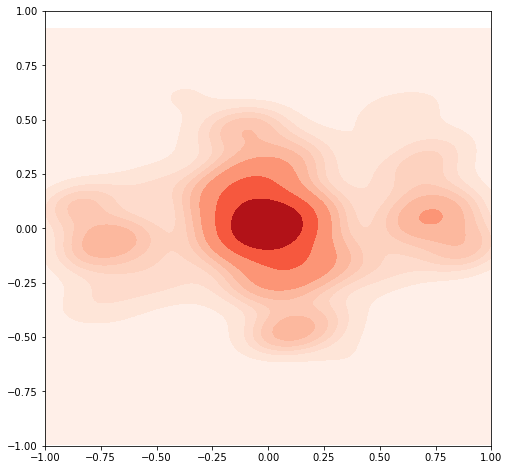

In [52]:
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
plt.figure(figsize=(8,8))
sns.kdeplot(character1_motion_vad[:,0], character1_motion_vad[:,1], cmap="Reds", shade=True, shade_lowest=True, )
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.show()
# # Some features are characteristic of 2D: color palette and wether or not color the lowest range
# plt.figure(figsize=(8,8))
# sns.kdeplot(character1_motion_vad[:,2], character1_motion_intimacy, cmap="Blues", shade=True, shade_lowest=True, )
# plt.ylim(0, 1)
# plt.xlim(0, 1)
# plt.show()

In [53]:
domince_intimacy_count = {}
for item in all_survey:
    idx = item["dominance"] + "," + item["intimacy"]
    domince_intimacy_count[idx] = domince_intimacy_count.get(idx , 0) + 1

In [54]:
domince_intimacy_count

{'Equal,Medium': 308,
 'Character two,Close': 141,
 'Character one,Medium': 123,
 'Character two,Alienated': 50,
 'Character one,Alienated': 56,
 'Character two,Medium': 173,
 'Equal,Close': 227,
 'Character one,Close': 74,
 'Equal,Alienated': 88}

In [55]:
for key in domince_intimacy_count:
    print(key,domince_intimacy_count[key] / 1240)

Equal,Medium 0.24838709677419354
Character two,Close 0.11370967741935484
Character one,Medium 0.09919354838709678
Character two,Alienated 0.04032258064516129
Character one,Alienated 0.04516129032258064
Character two,Medium 0.13951612903225807
Equal,Close 0.18306451612903227
Character one,Close 0.05967741935483871
Equal,Alienated 0.07096774193548387


In [56]:
emotion_vad = []
motion_vad = []

for item in all_survey[0:440]:
    #if item["quality"] != "Good" and item["quality"] != "Bad":
    if item["quality"] == "Bad":
        item_delta_m = np.asarray(G_EMOTION2VAD[item['e12']]) - np.asarray(G_EMOTION2VAD[item['e11']] )
        motion_item_vad = G_MOTION2VAD[item['m1']]
        emotion_vad.append(item_delta_m)
        motion_vad.append(motion_item_vad)

In [57]:
emotion_vad = np.asarray(emotion_vad)
motion_vad = np.asarray(motion_vad)

In [58]:
print(np.corrcoef(emotion_vad[:,0],motion_vad[:,0])[0,1])
print(np.corrcoef(emotion_vad[:,1],motion_vad[:,1])[0,1])
print(np.corrcoef(emotion_vad[:,2],motion_vad[:,2])[0,1])


-0.010776336628993433
0.026074268512852605
0.17606968323955252


In [59]:
# intimacy and dominance

In [60]:
440 * 0.36818181818181817 + 400* 0.395 + 400 * 0.4

480.0

In [62]:
ori_hip = [-0.38006502389907837, -0.6444794535636902, -0.9757303595542908, -1.2109700441360474, -1.1789124011993408, -0.9004634022712708, -0.46649602055549616, 0.2444179952144623, 1.283331274986267, 2.3771564960479736, 3.099874973297119, 3.1255486011505127, 2.3501670360565186, 1.21611487865448, 0.509434700012207, 0.032069385051727295, -1.8519537448883057, -5.97668981552124, -10.826339721679688, -14.0231294631958, -14.8091983795166, -14.311807632446289, -12.867216110229492, -10.15308952331543, -7.023797988891602, -5.7935261726379395, -7.432155132293702, -9.649025917053223, -9.759223937988281, -7.32368278503418, -3.5177993774414062, 0.11207597702741623, 2.492483377456665, 3.2842061519622803, 2.9847288131713867, 2.386300563812256, 1.8427248001098633, 1.2951871156692505, 0.6837525963783264, 0.1259777843952179, -0.20431742072105408, -0.2394775003194809, -0.15360663831233978, -0.18267498910427094]


In [63]:
new_hip = [-0.38006502389907837, -0.3263451801268039, -0.17782561205051567, 0.046533735468983636, 0.32777291757089105, 0.6469319893944044, 0.9850510060787203, 1.323170022763036, 1.6423290945865492, 1.9235682766884568, 2.147927624207956, 2.2964471922842438, 2.3501670360565186, 2.1657255945934195, 1.6557992564307311, 0.8854850009083745, -0.08012019263373482, -1.1759193448556806, -2.3368154764175424, -3.497711607979404, -4.593510760201349, -5.559115953743459, -6.329430209265815, -6.839356547428503, -7.0237979888916025, -6.849340943274674, -6.3670185230396426, -5.638403803110123, -4.725069858409738, -3.688589763862118, -2.5905365943908696, -1.492483424919622, -0.4560033303720016, 0.457330614328385, 1.1859453342579043, 1.6682677544929354, 1.8427248001098633, 1.8427248001098633, 1.8427248001098633, 1.8427248001098633, 1.8427248001098633, 1.8427248001098633, 1.8427248001098633, 1.8427248001098633]


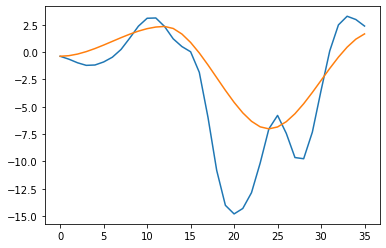

In [67]:
plt.plot(ori_hip[:36])
plt.plot(new_hip[:36])

In [69]:
ori_right_hand = [-3.6532719135284424, -2.4458742141723633, -0.18749694526195526, 2.7306039333343506, 4.628219127655029, 3.5743839740753174, 0.7603961825370789, -0.8271579742431641, 0.5150488018989563, 4.491099834442139, 8.354715347290039, 7.892362594604493, 0.15066568553447723, -14.27043628692627, -31.996072769165036, -47.935882568359375, -57.62312316894531, -60.574710845947266, -58.96118164062501, -55.81801223754883, -52.85965347290039, -50.296966552734375, -47.71205139160156, -44.57844543457031, -39.71898651123047, -30.823919296264645, -17.67666244506836, -4.557494163513184, 4.52581262588501, 9.650466918945312, 13.005280494689941, 14.604147911071777, 12.652015686035156, 8.562968254089355, 4.382285118103027, 0.9738304615020752, -1.3453025817871094, -2.419121503829956, -2.411846160888672, -1.8726952075958252, -1.6108901500701904, -2.1334023475646973, -3.1414499282836914, -3.8289067745208745]
new_right_hand = [-3.6532719135284424, -3.5784259191024357, -3.3714987580423004, -3.058906663674861, -2.6670658693269447, -2.2223926083253764, -1.7513031139969826, -1.2802136196685883, -0.8355403586670206, -0.4436995643191039, -0.13110746995166522, 0.07581969110847066, 0.15066568553447723, -0.6338066377814985, -2.802641884596262, -6.0789674702100465, -10.185910809923099, -14.846599319035676, -19.784160412847996, -24.721721506660316, -29.382410015772905, -33.489353355485946, -36.76567894109972, -38.93451418791451, -39.718986511230476, -38.96394874872985, -36.87649140534579, -33.723098397254944, -29.770253640634035, -25.28444105165977, -20.53214454650879, -15.779848041357813, -11.294035452383541, -7.341190695762633, -4.187797687671797, -2.100340344287734, -1.3453025817871094, -1.3453025817871094, -1.3453025817871094, -1.3453025817871094, -1.3453025817871094, -1.3453025817871094, -1.3453025817871094, -1.3453025817871094]


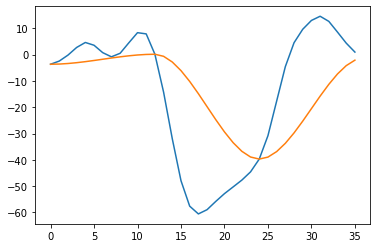

In [70]:
plt.plot(ori_right_hand[:36])
plt.plot(new_right_hand[:36])

In [76]:
np.mean([np.abs(ori_right_hand[i] - new_right_hand[i]) for i in range(len(ori_right_hand))])

13.702384598214518

In [151]:
#hip
a1 = [71.39126586914062, 71.35790252685547, 71.3344955444336, 71.34332275390625, 71.35773468017578, 71.39173889160156, 71.41556549072266, 71.34567260742188, 71.2135238647461, 71.11377716064453, 70.97589111328125, 70.6475830078125, 70.14389038085938, 69.51231384277344, 68.59880828857422, 67.58462524414062, 66.59654998779297, 65.6142349243164, 64.52007293701172, 63.339710235595696, 62.42269515991211, 62.03171157836914, 62.242191314697266, 62.764686584472656, 63.11152648925781, 63.316387176513665, 63.52951812744141, 63.714488983154304, 63.75419998168945, 63.55831527709961, 63.258766174316406, 62.973873138427734, 63.053951263427734, 63.25790023803712, 63.57474517822266, 63.97689437866211, 64.45034790039062, 64.97122192382812, 65.52201080322266, 66.08203887939453, 66.63188934326172, 67.19847869873047, 67.76920318603516, 68.18047332763672, 68.55186462402344, 68.88671112060547, 69.18634033203125, 69.45357513427734, 69.69022369384766, 69.89875793457031, 70.08134460449219, 70.24016571044922, 70.37757873535156, 70.49567413330078, 70.59695434570312, 70.68338775634766, 70.75751495361328, 70.82135772705078, 70.87742614746094, 70.927734375, 70.97474670410156, 71.0206527709961, 71.06771087646484, 71.04798889160156, 71.06443786621094, 71.19390106201172]
b1 = [71.39126586914062, 71.39054400832565, 71.38549098262081, 71.37177562713623, 71.34506677698207, 71.30103326726842, 71.23534393310547, 71.14366760960331, 71.0216731318721, 70.86502933502197, 70.66940505416305, 70.43046912440546, 70.14389038085938, 69.74348663400721, 69.1898580480505, 68.51884698867798, 67.76629582157842, 66.96804691244054, 66.15994262695314, 65.37782533080491, 64.6575373896846, 64.034921169281, 63.54581903528285, 63.226073353378865, 63.11152648925781, 63.11692989976318, 63.13455611688119, 63.16652911901475, 63.2149728845667, 63.28201139193994, 63.36976861953736, 63.48036854576182, 63.61593514901621, 63.77859240770341, 63.97046430022629, 64.19367480498772, 64.45034790039062, 64.76301153721633, 65.1436846167953, 65.57872754335403, 66.05450072111907, 66.5573645543169, 67.07367944717407, 67.58980580391707, 68.09210402877241, 68.56693452596664, 69.00065769972623, 69.37963395427775, 69.69022369384766, 69.94392734545248, 70.16294292167382, 70.34967720508575, 70.50653697826245, 70.63592902377799, 70.74026012420654, 70.8219370621222, 70.8833666200991, 70.92695558071136, 70.95511072653312, 70.97023884013846, 70.97474670410156, 70.97474670410156, 70.97474670410156, 70.97474670410156, 70.97474670410156, 70.97474670410156]

#a = [7.692334651947022, 7.558613300323485, 7.421775817871094, 7.335047721862793, 7.226619243621826, 7.165477752685547, 7.210280895233155, 7.280063629150391, 7.488940715789796, 7.796245574951172, 7.990828514099121, 8.371103286743164, 8.851216316223145, 9.608563423156738, 10.811369895935059, 12.66443920135498, 15.097595214843748, 17.342836380004883, 19.497671127319336, 22.184741973876953, 24.446487426757812, 25.94359016418457, 26.84951400756836, 26.87754249572754, 25.880252838134766, 24.49543571472168, 23.205503463745117, 21.954448699951172, 20.51521873474121, 19.027097702026367, 17.71818733215332, 16.436748504638672, 15.197296142578125, 14.030304908752441, 12.970211029052734, 11.849974632263184, 10.703997611999512, 9.582507133483887, 8.584427833557129, 7.712280750274659, 6.920214653015137, 6.132984638214111, 5.522741794586182, 5.2872138023376465, 5.046624660491943, 4.840742588043213, 4.885838508605957, 5.114893436431885, 5.363781452178955, 5.536662578582764, 5.659789085388184, 5.785403728485107, 5.949735641479492, 6.143876075744629, 6.299004077911377, 6.415616035461426, 6.542571067810059, 6.808737754821777, 7.124802112579346, 7.209195137023926, 7.336449146270752, 7.44163942337036, 7.530656337738037, 7.6002211570739755, 7.645349025726318, 7.684459209442139]
#b = [7.692334651947022, 7.693005301058292, 7.697699844837189, 7.710442177951337, 7.735256195068359, 7.776165790855885, 7.837194859981538, 7.922367297112943, 8.035706996917725, 8.181237854063513, 8.362983763217926, 8.584968619048595, 8.851216316223145, 9.429724004809502, 10.515015895719882, 12.000906474888325, 13.781210228248877, 15.749741641735591, 17.8003152012825, 19.82674539282366, 21.72284670229312, 23.382433615624905, 24.699320618753077, 25.567322197611688, 25.880252838134766, 25.64694723335129, 24.993544943906645, 23.989817757159475, 22.70553746046843, 21.21047584119219, 19.574404686689377, 17.867095784318668, 16.15832092143872, 14.517851885408163, 13.015460463585676, 11.720918443329914, 10.703997611999512, 9.880609956742436, 9.121130246807029, 8.427024442702532, 7.799758504938195, 7.24079839402327, 6.751610070466995, 6.333659494778624, 5.9884126274674045, 5.717335429042579, 5.521893860013398, 5.403553880889109, 5.363781452178955, 5.402595515604372, 5.509904985074645, 5.672010779380798, 5.875213817313865, 6.105815017664875, 6.3501152992248535, 6.594415580784832, 6.825016781135842, 7.028219819068909, 7.190325613375062, 7.297635082845335, 7.336449146270752, 7.336449146270752, 7.336449146270752, 7.336449146270752, 7.336449146270752, 7.336449146270752]
a2 = [5.59346866607666, 5.566958904266357, 5.528969764709473, 5.659362316131592, 5.701995372772217, 5.529333114624023, 5.456699371337891, 5.492461681365967, 5.443326473236084, 5.280690670013428, 5.139984607696533, 5.026659965515137, 5.101402282714844, 5.367135047912598, 5.686306476593018, 6.084961414337158, 6.76342248916626, 7.23215389251709, 7.146612167358398, 6.765097618103027, 6.3823981285095215, 5.988414287567139, 5.607875347137451, 5.381871223449707, 5.726125717163086, 6.254953861236572, 6.787921905517578, 7.1522016525268555, 7.283777713775634, 7.107266902923584, 6.426422119140625, 6.007670879364014, 5.772331714630127, 5.57944393157959, 5.427377223968506, 5.308223247528076, 5.21849250793457, 5.150605201721191, 5.09926176071167, 5.057769775390625, 5.020298004150391, 5.002610683441162, 5.145691394805908, 5.2484917640686035, 5.340632915496826, 5.422950744628906, 5.495638847351074, 5.559353828430176, 5.614360332489014, 5.661145210266113, 5.700047492980957, 5.731439113616943, 5.7557196617126465, 5.773136615753174, 5.784134864807129, 5.788928985595703, 5.787991523742676, 5.781409740447998, 5.769843578338623, 5.753264427185059, 5.732272624969482, 5.70695161819458, 5.677858829498291, 5.610251426696777, 5.563225269317627, 5.558736801147461]
b2 = [5.59346866607666, 5.583786804366995, 5.557019304346155, 5.516583293676376, 5.465895900019893, 5.408374251038939, 5.347435474395752, 5.286496697752565, 5.228975048771611, 5.178287655115128, 5.137851644445349, 5.111084144424509, 5.101402282714844, 5.113694294735237, 5.147678092673973, 5.199015319347382, 5.263367617571795, 5.336396630163546, 5.413763999938965, 5.491131369714384, 5.5641603823061345, 5.628512680530548, 5.679849907203956, 5.713833705142693, 5.726125717163086, 5.716137563740766, 5.6885232572202336, 5.646808028221131, 5.5945171073631, 5.535175725265786, 5.472309112548829, 5.40944249983187, 5.350101117734556, 5.297810196876527, 5.256094967877424, 5.22848066135689, 5.21849250793457, 5.224646278415565, 5.24186952136181, 5.268305134028196, 5.3020960136696145, 5.341385057540955, 5.384315162897111, 5.429029226992969, 5.473670147083424, 5.5163808204233655, 5.555304144267684, 5.588583015871269, 5.614360332489014, 5.63466861664697, 5.652827222038199, 5.668909292668104, 5.682987972542092, 5.695136405665566, 5.70542773604393, 5.71393510768259, 5.72073166458695, 5.725890550762415, 5.729484910214389, 5.731587886948277, 5.732272624969482, 5.732272624969482, 5.732272624969482, 5.732272624969482, 5.732272624969482, 5.732272624969482]

#left arm x 
a3 = [16.179323196411133, 16.222627639770508, 16.273488998413086, 16.246074676513672, 16.16757583618164, 16.071514129638672, 16.008705139160156, 16.09316635131836, 16.28341293334961, 16.462181091308594, 16.77081871032715, 17.386554718017578, 18.133275985717773, 19.047182083129883, 20.442577362060547, 22.043771743774414, 23.376827239990234, 24.482295989990234, 25.512540817260742, 26.415884017944336, 27.009057998657227, 27.379863739013672, 27.349781036376953, 26.843788146972656, 26.448213577270508, 26.33439826965332, 26.227792739868164, 25.844533920288086, 24.997783660888672, 23.987499237060547, 23.167734146118164, 22.82387924194336, 22.48868179321289, 22.123159408569336, 21.73731803894043, 21.344762802124023, 20.958404541015625, 20.590129852294922, 20.254026412963867, 19.961091995239258, 19.727384567260742, 19.624147415161133, 19.60099983215332, 19.49741554260254, 19.363174438476562, 19.20255470275879, 19.018390655517578, 18.814638137817383, 18.594573974609375, 18.361909866333008, 18.12019920349121, 17.873046875, 17.624176025390625, 17.377214431762695, 17.13582420349121, 16.903804779052734, 16.684600830078125, 16.48225975036621, 16.30017852783203, 16.14263343811035, 16.012290954589844, 15.914297103881836, 15.850584030151365, 15.91286563873291, 16.044654846191406, 16.13948631286621]
b3 = [16.179323196411133, 16.185084479826468, 16.205207542136865, 16.243951201438904, 16.305574275829173, 16.39433558340426, 16.514493942260742, 16.67030817049521, 16.866037086204248, 17.105939507484436, 17.394274252432368, 17.735300139144613, 18.133275985717773, 18.656410098075867, 19.34346177842882, 20.154516339302063, 21.049659093221027, 21.98897535271115, 22.93255043029785, 23.840469638506573, 24.672818289862743, 25.389681696891788, 25.951145172119144, 26.31729402807024, 26.44821357727051, 26.365193618116557, 26.132459662578725, 25.774500593543056, 25.31580529389558, 24.780862646522348, 24.194161534309387, 23.580190840142745, 22.963439446908456, 22.36839623749256, 21.8195500947811, 21.341389901660108, 20.958404541015625, 20.652668539572645, 20.386059633007754, 20.15277151763439, 19.946997889765985, 19.762932445715975, 19.59476888179779, 19.43670089432487, 19.28292217961064, 19.127626433968548, 18.96500735371201, 18.78925863515448, 18.594573974609375, 18.370593942977766, 18.117060325763845, 17.843318641185764, 17.558714407461665, 17.27259314280969, 16.994300365447998, 16.73318159359473, 16.498582345468026, 16.29984813928604, 16.146324493266917, 16.0473569256288, 16.012290954589844, 16.012290954589844, 16.012290954589844, 16.012290954589844, 16.012290954589844, 16.012290954589844]


#a1 = [34.56724548339844, 34.52903747558594, 34.652923583984375, 34.44217300415039, 32.63909912109375, 28.00132942199707, 21.386756896972656, 14.78000545501709, 10.45221996307373, 10.030646324157715, 12.290987014770508, 15.235124588012697, 19.012277603149414, 25.772045135498047, 34.880069732666016, 44.897518157958984, 52.299034118652344, 51.85554122924805, 44.00524139404297, 32.85152816772461, 23.012378692626953, 18.52312660217285, 20.499189376831055, 27.110780715942383, 35.57244873046875, 43.54644012451172, 45.981082916259766, 39.6352424621582, 29.919260025024418, 21.98834228515625, 16.527875900268555, 14.166531562805176, 15.147194862365723, 19.296337127685547, 25.600948333740234, 32.70042037963867, 37.503265380859375, 36.19504165649414, 30.382038116455078, 24.53237533569336, 20.426794052124023, 18.247419357299805, 17.35330581665039, 16.509174346923828, 15.793755531311033, 16.026769638061523, 16.800230026245117, 17.918275833129883, 19.64682960510254, 21.367441177368164, 21.878877639770508, 20.916711807250977, 18.914859771728516, 14.961177825927733, 8.843815803527832, 2.906020164489746, 0.06935480237007141, 0.8819599747657776, 3.9613277912139893, 8.232861518859863, 12.993803977966309, 17.752742767333984, 21.827693939208984, 24.98600959777832, 27.657230377197266, 29.613225936889652, 30.84584617614746, 31.44231605529785, 31.829740524291992, 32.36484909057617, 33.0394172668457, 33.59124755859375, 33.88020706176758, 33.97718048095703, 34.0755500793457, 34.282501220703125]
#b1 = [34.56724548339844, 34.2611870876065, 33.41502564041703, 32.13678175210953, 30.534476032963507, 28.71612909325847, 26.789761543273926, 24.86339399328938, 23.045047053584348, 21.442741334438324, 20.16449744613082, 19.31833599894135, 19.012277603149414, 19.30124106892833, 20.10487245630335, 21.32828325033188, 22.876584936071325, 24.654888998579096, 26.568306922912598, 28.521950194129232, 30.420930297286425, 32.17035871744156, 33.67534693965206, 34.84100644897531, 35.57244873046875, 36.01604491693002, 36.38589463410554, 36.68870210647582, 36.93117155852141, 37.12000721472281, 37.26191329956055, 37.36359403751514, 37.431753653067126, 37.47309637069702, 37.49432641488534, 37.50214801011262, 37.503265380859375, 37.229933911727535, 36.46424075629976, 35.287637792527676, 33.7815768983629, 32.02750995175706, 30.10688883066177, 28.101165413028664, 26.09179157680936, 24.160219199955467, 22.387900160418614, 20.856286336150443, 19.64682960510254, 18.657810342256678, 17.735641283017618, 16.883972845971584, 16.10645544970478, 15.406739512803378, 14.78847545385361, 14.255313691441664, 13.810904644153736, 13.45889873057604, 13.202946369294768, 13.046697978896125, 12.993803977966309, 13.40476329790221, 14.540944947136778, 16.257304459810257, 18.408797370062924, 20.85037921203508, 23.437005519866943, 26.0236318276988, 28.46521366967096, 30.616706579923626, 32.33306609259711, 33.469247741831666, 33.88020706176758, 33.88020706176758, 33.88020706176758, 33.88020706176758]


In [152]:
print(np.max([np.abs(a[i] - b[i]) for i in range(len(a))]))
#print(np.min([np.abs(a[i] - b[i]) for i in range(len(a))]))
print(np.mean([np.abs(a[i] - b[i]) for i in range(len(a))]))


3.0927744284272203
0.6357855899549919


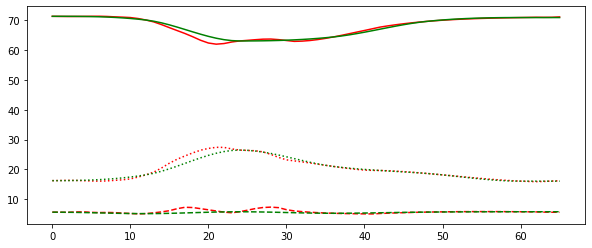

In [153]:
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
plt.figure(figsize=(10,4))

plt.plot(a1, color="red")
plt.plot(b1, color="green")

plt.plot(a2, "--", color="red")
plt.plot(b2, "--", color="green")

plt.plot(a3, ":", color="red")
plt.plot(b3, ":", color="green")
